In [7]:
import imageio
import numpy as np
from PIL import Image

def create_grid_animation_for_generation(generation_frames):
    # Assuming `generation_frames` is a list of lists, where each sublist contains the frames for one individual.
    # Determine the max number of frames in this generation to synchronize animations.
    max_frames = max(len(individual_frames) for individual_frames in generation_frames)
    grid_width = 100
    grid_height = 100
    individual_frame_width = 10
    individual_frame_height = 10
    
    # Create a placeholder for the grid frames
    grid_frames = []
    
    for frame_index in range(max_frames):
        # Create a blank image for this frame of the grid
        grid_image = Image.new('RGB', (grid_width, grid_height))
        
        for i, individual_frames in enumerate(generation_frames):
            if frame_index < len(individual_frames):
                frame = individual_frames[frame_index]
            else:
                # Repeat the last frame if this individual has fewer frames
                frame = individual_frames[-1]
            
            # Calculate the position of this individual's frame in the grid
            row = i // 8
            col = i % 8
            x = col * individual_frame_width
            y = row * individual_frame_height
            
            # Paste the individual frame into the grid
            grid_image.paste(frame, (x, y))
        
        grid_frames.append(np.array(grid_image))
    
    return grid_frames

# Example usage:
# for each generation
# generation_frames = load_generation_frames("generation_1")
# grid_frames = create_grid_animation_for_generation(generation_frames)
#    # Append `grid_frames` to a list that holds all frames for all generations
# final_animation_frames = combine_all_generation_frames(...)
# imageio.mimsave(final_vid_path, final_animation_frames, format='GIF', fps=30, loop=0)

In [ ]:
!pip install imageio

100%|██████████████████████████████████████| 101/101 [00:00<00:00, 19840.98it/s]


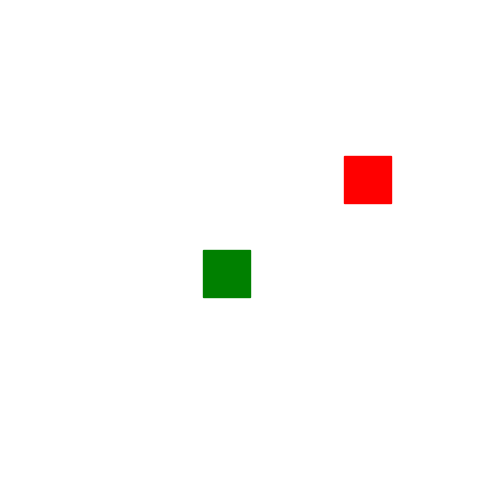

ValueError: images do not match

In [30]:
from tqdm import tqdm
import imageio
import os

from PIL import Image
import numpy as np

def create_grid_animation_for_generation(generation_frames):
    # Assuming `generation_frames` is a nested list: [individual_frames[...], ...]
    # and each individual_frames list contains frames for one individual simulation.

    # Determine the grid size, frame size, and create a blank image for the grid
    grid_rows, grid_cols = 10, 10  # For an 8x8 grid
    frame_width, frame_height = 100, 100  # Assuming each frame is 64x64 pixels
    grid_frame_width = grid_cols * frame_width
    grid_frame_height = grid_rows * frame_height

    grid_frames = []  # To hold each grid frame

    # Determine the maximum number of frames any individual has
    max_frames = max(len(individual) for individual in generation_frames)

    for frame_idx in range(max_frames):
        # Create a new blank image for each frame of the grid animation
        grid_image = Image.new("RGBA", (grid_frame_width, grid_frame_height))

        for idx, individual_frames in enumerate(generation_frames):
            if frame_idx < len(individual_frames):
                # Get the current frame for this individual
#                 frame = Image.fromarray(individual_frames[frame_idx]).convert("RGB")
                
                frame = Image.open(individual_frames[frame_idx]).convert("RGBA")
                frame.show()
                # Calculate the position in the grid
                row, col = divmod(idx, grid_cols)
                x, y = col * frame_width, row * frame_height

                # Paste the frame onto the grid
                box = (x, y, x + frame_width, y + frame_height)
                
                # Example adjustment for mode compatibility before pasting
#                 frame = frame.resize((10, 10)).convert("RGB")
    
                grid_image.paste(frame, box)

        # Convert the PIL image to a numpy array and add to the list of grid frames
        grid_frames.append(np.array(grid_image))

    return grid_frames


def load_generation_frames(generation_folder):
    """
    Load all frames of all individuals in a specified generation.
    
    Parameters:
    - generation_folder (str): Path to the generation's folder.
    
    Returns:
    - List[List[np.array]]: A nested list where each sublist contains the frames (as np.arrays) of an individual.
    """    
    # List to hold frames of all individuals in the generation
    all_individuals_frames = []
    
    # Iterate over each individual's folder in the generation
    for individual_folder in tqdm(sorted(os.listdir(gen_path))):
        individual_path = os.path.join(gen_path, individual_folder)
        
        if os.path.isdir(individual_path):
            # List to hold frames for the current individual
            individual_frames = []
            
            # Sort frame files by their sequence number to ensure correct order
            frame_files = sorted(os.listdir(individual_path), key=lambda x: int(x.split('_')[1].split('.')[0]))
            
            # Load each frame and append to the individual's list
            for frame_file in frame_files:
                frame_path = os.path.join(individual_path, frame_file)
#                 individual_frames.append(imageio.imread(frame_path))
                individual_frames.append(frame_path)
            
            # Add the individual's frames to the list of all individuals
            all_individuals_frames.append(individual_frames)
    
    return all_individuals_frames

gen_path = os.path.join("./outputs/snake-v0.1", "generation_1")
frames = load_generation_frames(gen_path)

grid_frames = create_grid_animation_for_generation(frames)
   # Append `grid_frames` to a list that holds all frames for all generations
# final_animation_frames = combine_all_generation_frames(...)
# imageio.mimsave(final_vid_path, final_animation_frames, format='GIF', fps=30, loop=0)